# News Mood

## Analysis
- Overall, CBS's last 100 tweets have the highest positive compound score (average) of all analyzed news media tweets.
- New York Times' last 100 tweets have the most negative compound score (average) of all analysed news media tweets.
- Fox News' last 100 tweets have been mainly neutral. 

In [1]:
#Dependencies and modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import json
import tweepy
from textblob import TextBlob

In [2]:
#Initialize Senitment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [3]:
#Twitter API Keys 
consumer_key = input("Your consumer key")
consumer_secret = input("Your consumer secret key")
access_token = input("Your access token key")
access_token_secret = input("Your access token secret key")

#Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [4]:
#Target Search Term
target_terms = ("@BBC", "@CBS", "@CNN", "@FoxNews", "@nytimes")


#Counters
row_count = 0

#Array to hold sentiments
sentiments = []

#Loop through target terms
for target in target_terms:
    
    #Search tweet from user home feed 
    public_tweets = api.user_timeline(target, count=100, result_type="recent")
    
    #Loop through tweets
    for tweet in public_tweets:
        
        #Run Vader Analysis on tweets
        compound = analyzer.polarity_scores(tweet["text"])["compound"]
        pos = analyzer.polarity_scores(tweet["text"])["pos"]
        neu = analyzer.polarity_scores(tweet["text"])["neu"]
        neg = analyzer.polarity_scores(tweet["text"])["neg"]
        
        #Store sentiments
        sentiments.append({"Date": tweet["created_at"],
                        "User": target,
                        "Compound": compound,
                        "Positive": pos,
                        "Neutral": neu,
                        "Negative": neg,
                        "Tweet": tweet["text"],
                        "Tweets Ago": row_count})
        
        #assign number for every 100 tweets per user
        row_count += 1
        if row_count > 99:
            row_count = 0

In [5]:
#Convert array into dataframe
sentiments_df = pd.DataFrame.from_dict(sentiments)
sentiments_df = sentiments_df[["User","Tweet", "Date", "Compound", "Positive", "Neutral", "Negative", "Tweets Ago"]]
sentiments_df.head()

#Create output csv file
sentiments_df.to_csv("output.csv")

In [6]:
#Create plot 
#Separate data by username
bbc_data = sentiments_df.loc[sentiments_df["User"] == "@BBC"]
cbs_data = sentiments_df.loc[sentiments_df["User"] == "@CBS"]
cnn_data = sentiments_df.loc[sentiments_df["User"] == "@CNN"]
fox_data = sentiments_df.loc[sentiments_df["User"] == "@FoxNews"]
nyt_data = sentiments_df.loc[sentiments_df["User"] == "@nytimes"]

#finding x, y of BBC tweets
bbc_x = bbc_data["Tweets Ago"]
bbc_y = bbc_data["Compound"]

#finding x, y of CBS tweets
cbs_x = cbs_data["Tweets Ago"]
cbs_y = cbs_data["Compound"]

#finding x, y of CNN tweets
cnn_x = cnn_data["Tweets Ago"]
cnn_y = cnn_data["Compound"]

#finding x, y of Fox tweets
fox_x = fox_data["Tweets Ago"]
fox_y = fox_data["Compound"]

#finding x, y of NYTimes tweets
nyt_x = nyt_data["Tweets Ago"]
nyt_y = nyt_data["Compound"]

## Sentiment Analysis of Tweets of Each Media Source

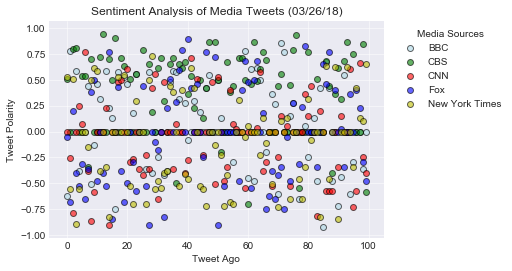

In [11]:
#Create scatter plot 
#Set x and y ranges 
xticks = np.arange(100, 0, 20)
yticks = np.arange(-1, 1, 0.5)

bbc = plt.scatter(bbc_x, bbc_y, c="lightblue", 
            edgecolor="black", marker="o", alpha=0.6)
cbs = plt.scatter(cbs_x, cbs_y, c="g", 
            edgecolor="black", marker="o", alpha=0.6)
cnn = plt.scatter(cnn_x, cnn_y, c="r", 
            edgecolor="black", marker="o", alpha=0.6)
fox = plt.scatter(fox_x, fox_y, c="b", 
            edgecolor="black", marker="o", alpha=0.6)
nyt = plt.scatter(nyt_x, nyt_y, c="y", 
            edgecolor="black", marker="o", alpha=0.6)

#title and axes labels
plt.title("Sentiment Analysis of Media Tweets (03/26/18)")
plt.xlabel("Tweet Ago")
plt.ylabel("Tweet Polarity")

#chart aesthetics 
plt.grid("on", alpha=0.6)
sns.set_style("darkgrid")

#create legend
plt.legend((bbc, cbs, cnn, fox, nyt),
          ("BBC", "CBS", "CNN", "Fox", "New York Times"),
          title="Media Sources", loc=9, bbox_to_anchor=(1.2, 1))

#plt.savefig("Sentiment scatter.png", bbox_inches="tight")
plt.show()

## Overall Media Sentiment 

In [8]:
#Create bar graph
#find x and y axes

media = ["BBC", "CBS", "CNN", "Fox", "NYT"]

bbc_avg = (sentiments_df.loc[sentiments_df["User"] == "@BBC"]).mean()
cbs_avg = (sentiments_df.loc[sentiments_df["User"] == "@CBS"]).mean()
cnn_avg = (sentiments_df.loc[sentiments_df["User"] == "@CNN"]).mean()
fox_avg = (sentiments_df.loc[sentiments_df["User"] == "@FoxNews"]).mean()
nyt_avg = (sentiments_df.loc[sentiments_df["User"] == "@nytimes"]).mean()

media_compound = [bbc_avg[0], cbs_avg[0], cnn_avg[0], fox_avg[0], nyt_avg[0]]

x_axis = np.arange(len(media_compound))

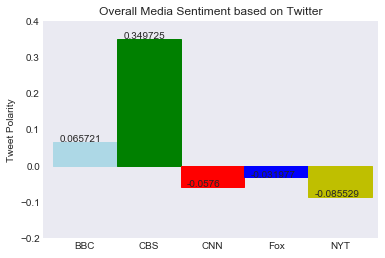

In [10]:
#create a bar group
media_bar = plt.bar(x_axis+0.4, media_compound, width=1, edgecolor="black")
media_bar[0].set_color("lightblue")
media_bar[1].set_color("g")
media_bar[2].set_color("r")
media_bar[3].set_color("b")
media_bar[4].set_color("y")

# Create the ticks for our bar chart's x axis
tick_locations = [value+0.4 for value in x_axis]
plt.xticks(tick_locations, media)

# Set the limits of the x and y axes
plt.xlim(-0.25, len(x_axis))
plt.ylim(-0.20, 0.40)

#label chart
plt.title("Overall Media Sentiment based on Twitter")
plt.ylabel("Tweet Polarity")

#chart aesthetics 
sns.set_style("dark")

#find value of each bar
for a, b in zip(x_axis, media_compound):
    plt.text(a, b, str(b))

#plt.savefig("Overall Sentiment.png", bbox_inches="tight")
plt.show()